# Project: Investigate a Dataset - Medical Appointments No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

This dataset collects information from over 110,000 medical appointments in Brazil in 14 associated variables and is focused on the question of whether or not patients show up for their appointments.

The data dictionary is given below:
1. **PatientId**: Identification of a patient
2. **AppointmentID**: Identification of each appointment
3. **Gender**: Male or Female
4. **ScheduledDay**: Date appointment was booked
5. **AppointmentDay**: Date for the appointment visit
6. **Age**: Age of the patient
7. **Neighbourhood**: Where the appointment takes place (city, town, provience, etc)
8. **Scholarship**: True or False if patient receives Government health benefits/subsidies
9. **Hipertension**: True or False if patient is hypertensive
10. **Diabetes**: True or False if patient is diabetic
11. **Alcoholism**: True or False if patient has an alcoholism condition
12. **Handcap**: True or False if patient is handicaped
13. **SMS_received**: 1 or more messages sent to the patient
14. **No-show**: True or False if patient shows up for the appointment

### Question(s) for Analysis
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2. How does the presence of a health condition affect the showing up or not of a patient?
3. Is there a relationship between the number of days to the appointment and failure to show up for the appointment?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

ERROR: Could not find a version that satisfies the requirement pandas==0.25.0 (from versions: none)
ERROR: No matching distribution found for pandas==0.25.0


In [2]:
# import statements for necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# read in the data and read a few lines of the data
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# check for duplicate records
df.duplicated().sum()

0

In [6]:
# check for null records
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# inspect the ScheduledDay and AppointmentDay columns
df[['ScheduledDay', 'AppointmentDay']][:5]

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


### Data Cleaning

From the visual and programmatic analysis performed; the dataset has few quality issues and no major tidiness concerns. These are identified and wranggled in the cells below.

In [8]:
# Issue 1: Inconsistent column names 
# Code: Rename the columns to all lowercase, remove underscores and hyphens
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(columns={'sms_received':'smsreceived', 'no-show':'noshow'}, inplace=True)

# Test
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'smsreceived', 'noshow'],
      dtype='object')

In [9]:
# Issue 2: Wrongly spelt column names 
# Code: Rename the columns to use correct spellings
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

# Test
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'smsreceived', 'noshow'],
      dtype='object')

In [10]:
# Issue 3: Unnecessary time component in scheduledday and appointmentday columns
# Code: Remove time component in scheduledday and appointmentday columns since they are not necessary in the analysis
df.scheduledday = df.scheduledday.apply(lambda x: x[:10].strip())
df.appointmentday = df.appointmentday.apply(lambda x: x[:10].strip())

# Test
df[['scheduledday', 'appointmentday']][:5]

,scheduledday,appointmentday
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


In [11]:
# Issue 4: Wrong datatype for appointmentday and scheduleday columns
# Code: Update the appointmentday and scheduleday columns to datetime objects
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

# Test
print(df.scheduledday[:2])
print(df.appointmentday[:2])

0   2016-04-29
1   2016-04-29
Name: scheduledday, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
Name: appointmentday, dtype: datetime64[ns]


In [12]:
# view the range of values for the appointmentday feature
df.appointmentday.max(), df.appointmentday.min(), df.appointmentday.max() - df.appointmentday.min()

(Timestamp('2016-06-08 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timedelta('40 days 00:00:00'))

In [13]:
# view the range of values for the scheduledday feature
df.scheduledday.max(), df.scheduledday.min(), df.scheduledday.max() - df.scheduledday.min()

(Timestamp('2016-06-08 00:00:00'),
 Timestamp('2015-11-10 00:00:00'),
 Timedelta('211 days 00:00:00'))

In [14]:
# Issue 5: Unnecessary columns in the dataset
# Code: Remove patientid and appointmentid columns since they are not necessary in the analysis
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True) 

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110527 non-null  object        
 1   scheduledday    110527 non-null  datetime64[ns]
 2   appointmentday  110527 non-null  datetime64[ns]
 3   age             110527 non-null  int64         
 4   neighbourhood   110527 non-null  object        
 5   scholarship     110527 non-null  int64         
 6   hypertension    110527 non-null  int64         
 7   diabetes        110527 non-null  int64         
 8   alcoholism      110527 non-null  int64         
 9   handicap        110527 non-null  int64         
 10  smsreceived     110527 non-null  int64         
 11  noshow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [15]:
# just thinking, should I change this to integer? 0 for No, 1 for Yes?
df.noshow.unique()

array(['No', 'Yes'], dtype=object)

I believe that it is better to perform analysis using numerical or categorical values. Hence, I will be encoding the `noshow` column as numerical column.

Note that for the `noshow` column, a `No` actually means that the patient showed up or came for their appointment. However, this seems confusing. So for pythonic simplicity, I'll be renaming the column and enoding the data appropriately.

In [16]:
# viewing the grouping of the dataset by the noshow feature
df.groupby(['noshow']).count()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived
noshow,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [17]:
# encode gender numerical columns ('M' == 1, 'F' == 0)
# df.gender = df.gender.apply(lambda x: '' if x in [1,2,3,4] else 0)

# Issue 6: Ambiguity in the representation of the noshow column 
# Code: Rename and encode noshow column as numerical columns ('No' == 0, 'Yes' == 1)
df.rename(columns={'noshow':'showedup'}, inplace=True)
df.showedup = df.showedup.apply(lambda x: 1 if x == 'No' else 0)

# Test
# viewing the grouping of the dataset by the updated noshow (now showedup) feature
# 1 -- 88208; 0 -- 22319
df.groupby(['showedup']).count()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived
showedup,,,,,,,,,,,
0,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319
1,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208


In [18]:
# get summary statistics for the data
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the summary statistics above, the age column and the handicap columns needs to be further reviewed due to the presence of `-1` as an age in the age column and the `4` as the max value in the handicap column

In [19]:
# checking the handicap column for tidiness issues
display(df.handicap.unique())

# view the count of handicap values
display(df.groupby(['handicap']).count())

array([0, 1, 2, 3, 4], dtype=int64)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,smsreceived,showedup
handicap,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3


The handicap column should ideally use a `True` or `False` (1, 0) values for data reprensentation. The presence of 2, 3, and 4 may be attributed to users with multiple handicaps. Hence, those values should be recorded as 1 since the patient has a handicap.

Note that each relevant column such as `gender`, `scholarship`, `hypertension`, `diabetes`, `alcoholism`, `handicap`, `smsreceived`, and `noshow` were equally accessed for their unique entries.

In [20]:
# Issue 7: Multiple reprensentation of handicaps in the handicap column
# Code: Record the handicap values 2, 3, and 4 as 1 since the patient has a handicap
df.handicap = df.handicap.apply(lambda x: 1 if x in [1,2,3,4] else 0)

# Test
display(df.handicap.unique())

# view the count of handicap values
display(df.groupby(['handicap']).count())

array([0, 1], dtype=int64)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,smsreceived,showedup
handicap,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241


In [21]:
# checking the age column for quality issues
df.loc[df.age == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [22]:
# view the unique values in the age column 
np.sort(df.age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [23]:
# get the number of records with age of 0
df[df.age == 0].shape[0]

3539

The age column contains records with an age of `0`. My assumption is that these records belongs to babies not yet up to `1` year old. Hence, only the `-1` entry would need to be treated in the age column.

In [24]:
# Issue 8: Minimum age in age column is -1
# Code: Update the age feature for index 99832 to 1. I am assuming that the `-` is an entry error
df.at[99832, 'age'] = 1

# Test
display(df.loc[df.age == -1])

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup


In [25]:
# checking for santiy issues with the age feature
# assuming that a child under 1 year old would not be an alcoholic
df[(df.age <= 0) & (df.alcoholism == 1)]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup


Since the number of unique values in the `age` column is much, it is advisable to categorize or bin the `age` of patients so as to clearly see the relationship between it and the `showedup` feature.

In [26]:
# create categorical variable from the age feature
# df['agebins'] = pd.qcut(df.age, 6, labels=['0-10', '11-24', '25-37', '38-50', '51-61', '62-115'])
df['agebins'] = pd.qcut(df.age, 6, labels=[1, 2, 3, 4, 5, 6])

# Note I am using the mapping labels=['0-10', '11-24', '25-37', '38-50', '51-61', '62-115']: labels=[1, 2, 3, 4, 5, 6]
# convert the categorial data to numeri type
df.agebins = pd.to_numeric(df.agebins)

# test
df.sample(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup,agebins
87956,F,2016-05-16,2016-06-03,68,ITARARÉ,0,1,1,0,0,0,1,6
3575,F,2016-04-13,2016-05-17,10,BONFIM,0,0,0,0,0,0,1,1
56648,F,2016-04-26,2016-05-05,57,ILHA DO PRÍNCIPE,1,0,0,0,0,1,0,5
110223,F,2016-05-11,2016-06-01,46,MARIA ORTIZ,0,0,0,0,0,1,0,4
43778,F,2016-04-27,2016-05-05,26,CONSOLAÇÃO,0,0,0,0,0,1,0,3


Since I am interested in disovering on what day of the week most patients miss their appointments I will be feature engineering new features in the dataset called `scheduledweekday`, `appointmentweekday`, and `numofdaystoappointment`.

In addition, since `appointmentday` is a later date than `scheduledday`, it is advisable to review the data to see records where the reverse is the case.

In [27]:
# view records where scheduledday is greater than appointmentday
df.loc[df.scheduledday > df.appointmentday]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup,agebins
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,4
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,2
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,2
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,1


Now the above 5 rows of data may have gotten into the dataset via various means. I assume that the data entry staff interchanged the date order. I will now reverse the order.

In [28]:
# Issue 9: Some scheduledday values greater than some appointmentday values
# Code: Update the scheduledday feature values to be always less than the 
#         appointmentday feature values
df.scheduledday = np.where((df.scheduledday - df.appointmentday).dt.days > 0, 
                          df.appointmentday, df.scheduledday)

# Test
df.loc[df.scheduledday > df.appointmentday]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,showedup,agebins


In [29]:
df.columns 

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'showedup', 'agebins'],
      dtype='object')

In [30]:
# create features using a mapping of numerial weekdays with Monday=0 (Start) and Sunday=6 (End)
df['scheduledweekday'] = df.scheduledday.dt.dayofweek
df['appointmentweekday'] = df.appointmentday.dt.dayofweek
df['numofdaystoappointment'] = df.appointmentday - df.scheduledday
df['numofdaystoappointment'] = df.numofdaystoappointment.dt.days

We now take a look at the `numofdaystoappointment` engineered feature. This feature contains a large number of unique and so shoud be set as a categorical data, and then converted to a numeric type to aid the analysis.

In [31]:
df.nunique()

gender                      2
scheduledday              111
appointmentday             27
age                       103
neighbourhood              81
scholarship                 2
hypertension                2
diabetes                    2
alcoholism                  2
handicap                    2
smsreceived                 2
showedup                    2
agebins                     6
scheduledweekday            6
appointmentweekday          6
numofdaystoappointment    129
dtype: int64

In [32]:
# create categorical variable from the numofdaystoappointment feature
df['numofdaystoappointment'] = pd.cut(df.numofdaystoappointment, 9, 
                                      labels=[1,2,3,4,5,6,7,8,9], precision=0)
df.numofdaystoappointment.unique()

[1, 2, 3, 4, 5, 6, 9, 8, 7]
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [33]:
# Note I am using the mapping labels=[(-0.0, 20.0], (20.0, 40.0], 
# (40.0, 60.0], (60.0, 80.0], (80.0, 99.0], (99.0, 119.0], (159.0, 179.0], 
# (139.0, 159.0], (119.0, 139.0]]]: labels=[1, 2, 3, 4, 5, 6, 7, 8, 9]
# convert the categorial data to numeric type
df.numofdaystoappointment = pd.to_numeric(df.numofdaystoappointment)

# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   gender                  110527 non-null  object        
 1   scheduledday            110527 non-null  datetime64[ns]
 2   appointmentday          110527 non-null  datetime64[ns]
 3   age                     110527 non-null  int64         
 4   neighbourhood           110527 non-null  object        
 5   scholarship             110527 non-null  int64         
 6   hypertension            110527 non-null  int64         
 7   diabetes                110527 non-null  int64         
 8   alcoholism              110527 non-null  int64         
 9   handicap                110527 non-null  int64         
 10  smsreceived             110527 non-null  int64         
 11  showedup                110527 non-null  int64         
 12  agebins                 110527

In [34]:
# I also think it would be tidy to move the showedup column to the end of the columns
df = df.reindex(columns=[col for col in df.columns if col != 'showedup'] + ['showedup'])

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   gender                  110527 non-null  object        
 1   scheduledday            110527 non-null  datetime64[ns]
 2   appointmentday          110527 non-null  datetime64[ns]
 3   age                     110527 non-null  int64         
 4   neighbourhood           110527 non-null  object        
 5   scholarship             110527 non-null  int64         
 6   hypertension            110527 non-null  int64         
 7   diabetes                110527 non-null  int64         
 8   alcoholism              110527 non-null  int64         
 9   handicap                110527 non-null  int64         
 10  smsreceived             110527 non-null  int64         
 11  agebins                 110527 non-null  int64         
 12  scheduledweekday        110527

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the important factors that could be used to predict if a patient will show up for their scheduled appointment?

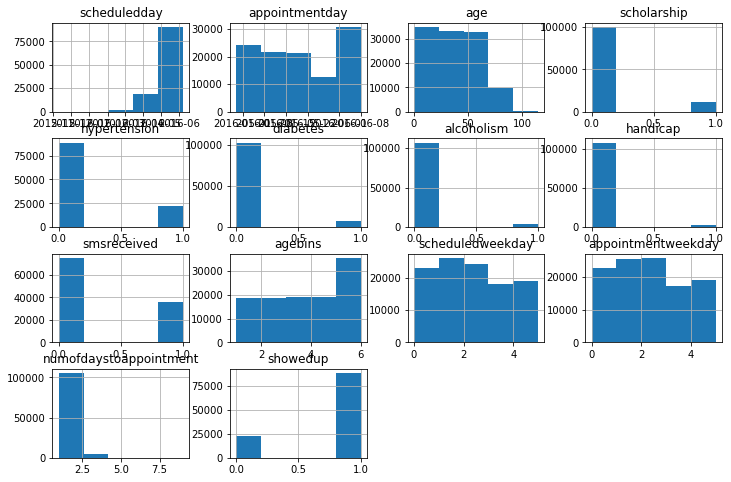

In [35]:
# exploring the dataset via a histogram object 
df.hist(figsize=(12,8), bins=5);

In [36]:
# exploring the dataset via the default pandas correlation object 
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,agebins,scheduledweekday,appointmentweekday,numofdaystoappointment,showedup
age,1.000000,-0.092458,0.504586,0.292392,0.095811,0.083743,0.012643,0.979602,0.011430,0.003087,0.038658,0.060319
scholarship,-0.092458,1.000000,-0.019729,-0.024894,0.035022,-0.009103,0.001194,-0.092455,-0.004956,-0.000673,-0.032218,-0.029135
hypertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.084852,-0.006267,0.498797,0.000695,0.003455,-0.014153,0.035701
diabetes,0.292392,-0.024894,0.433086,1.000000,0.018474,0.059145,-0.014550,0.293357,-0.000378,0.006614,-0.022923,0.015180
alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.003692,-0.026147,0.104517,0.006633,0.002701,-0.032152,0.000196
handicap,0.083743,-0.009103,0.084852,0.059145,0.003692,1.000000,-0.025220,0.076316,0.001017,0.004571,-0.015220,0.007281
smsreceived,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.025220,1.000000,0.014162,0.078568,-0.089858,0.270075,-0.126431
agebins,0.979602,-0.092455,0.498797,0.293357,0.104517,0.076316,0.014162,1.000000,0.010213,0.002659,0.037166,0.062240
scheduledweekday,0.011430,-0.004956,0.000695,-0.000378,0.006633,0.001017,0.078568,0.010213,1.000000,0.328819,0.003398,-0.005981
appointmentweekday,0.003087,-0.000673,0.003455,0.006614,0.002701,0.004571,-0.089858,0.002659,0.328819,1.000000,-0.009267,-0.001165


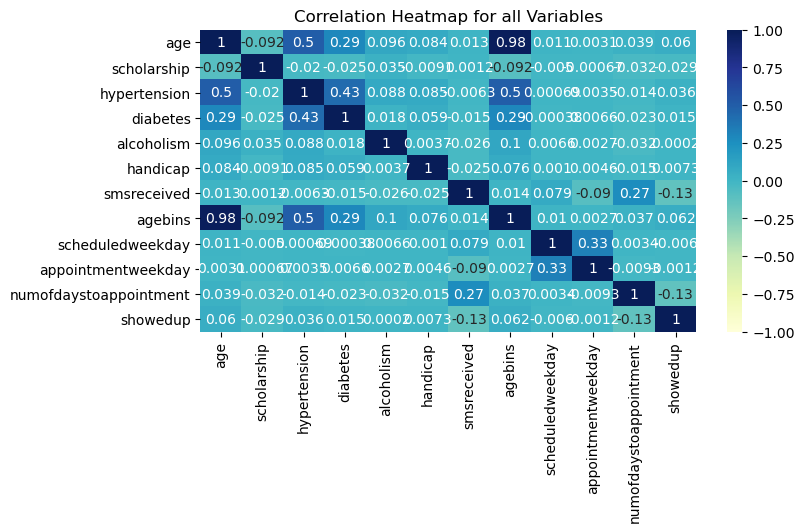

In [37]:
# view the correlation using seaborn 
plt.figure(figsize=(8,4), dpi=100)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, 
            cmap='YlGnBu').set_title('Correlation Heatmap for all Variables');

On the face of it, using the correlation view, this dataset does not immediately present a clear relationship between the `showedup` feature and other features in the dataset.

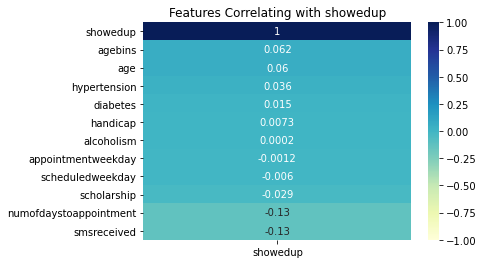

In [38]:
# visualizing the correlation of showedup with other features on 1-D
sns.heatmap(df.corr()[['showedup']].sort_values(by='showedup', ascending=False),
           vmin=-1, vmax=1, annot=True, cmap='YlGnBu').set_title('Features Correlating with showedup');

The above visual still shows no clear relationship between the variables and its support for the `showedup` variable.

Would now take a look at the relationship between variables using their probabilities.

In [39]:
def showedup_proba(data, selector):
    '''Function to calulate the probability of patient showing up for their 
    appointment wrt other variables
    '''
    df = pd.crosstab(data[selector], data.showedup).reset_index()
    df['probabilityofshowup'] = df[1]/(df[1]+df[0])
    
    return df[[selector, 'probabilityofshowup']]

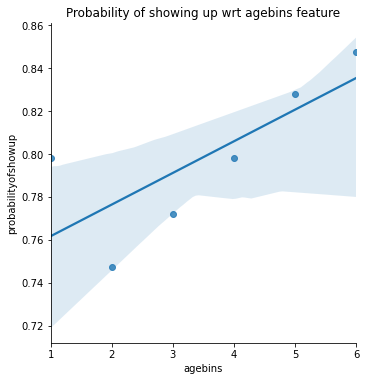

In [40]:
# probability of patient showing up for their appointment wrt agebins feature
sns.lmplot(data=showedup_proba(df, 'agebins'), x='agebins', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt agebins feature');

From the probability visualization on the `agebins` feature, the data suggests that older patients show a higher probability of showing up for their appointments.

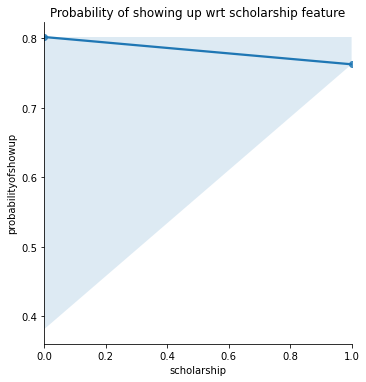

In [41]:
# probability of patient showing up for their appointment wrt scholarship feature
sns.lmplot(data=showedup_proba(df, 'scholarship'), x='scholarship', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt scholarship feature');

From the probability visualization on the `scholarship` feature, the data suggests that patients without a `scholarship` actually show a higher probability of showing up for their appointments than those with a `scholarship`.

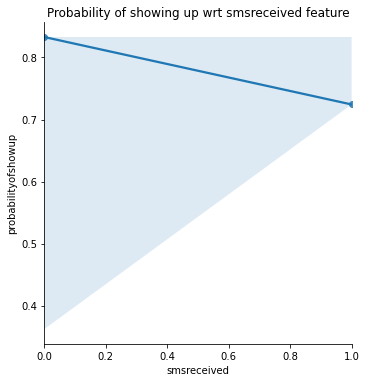

In [42]:
# probability of patient showing up for their appointment wrt smsreceived feature
sns.lmplot(data=showedup_proba(df, 'smsreceived'), x='smsreceived', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt smsreceived feature');

From the probability visualization on the `smsreceived` feature, the data suggests that patients that infact received an SMS have a lower probability of appearing for their appointments. This looks counter-intuitive.

It might be a good idea to further research this phenomenon at a later date.

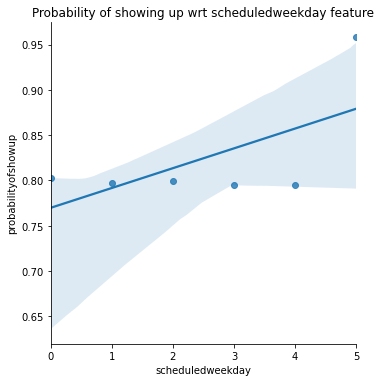

In [43]:
# probability of patient showing up for their appointment wrt scheduledweekday feature
sns.lmplot(data=showedup_proba(df, 'scheduledweekday'), x='scheduledweekday', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt scheduledweekday feature');

The data from the `scheduledweekday` feature suggests that the vast majority of the appointments were scheduled before Saturday and all such schedules have almost equal probability of showing up for the appointments. However, appointments scheduled on Saturday showed a high level of conformity (over 95%) with showing up for their appointments.

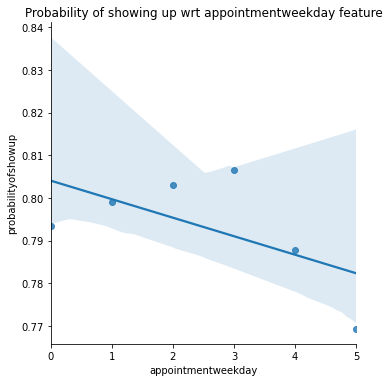

In [44]:
# probability of patient showing up for their appointment wrt appointmentweekday feature
sns.lmplot(data=showedup_proba(df, 'appointmentweekday'), x='appointmentweekday', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt appointmentweekday feature');

From the probability visualization on the `appointmentweekday` feature, the data suggests that appointments scheduled for Saturdays have a lower probability  of showing up for the appointments. However, appointments scheduled for midweek showed a good level of conformity (over 80%) with showing up for their appointments.

### Research Question 2: How does the presence of a health condition affect the showing up or not of a patient?

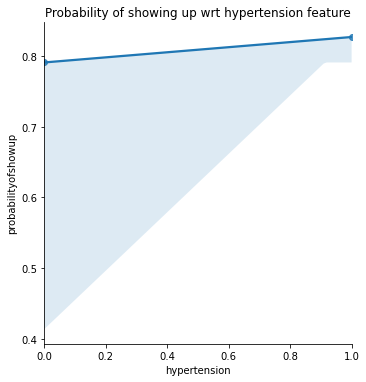

In [45]:
# probability of patient showing up for their appointment wrt hypertension feature
sns.lmplot(data=showedup_proba(df, 'hypertension'), x='hypertension', y='probabilityofshowup', fit_reg=True);
plt.title('Probability of showing up wrt hypertension feature');

From the probability visualization on the `hypertension` feature, the data suggests very weak correlation between patients with `hypertension` and those without and their ability to show up for their appointments. Generally, patients with `hypertension` show a higher probability of showing up for their appointments than those without `hypertension`.

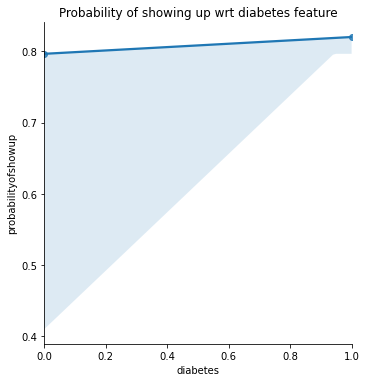

In [46]:
# probability of patient showing up for their appointment wrt diabetes feature
sns.lmplot(data=showedup_proba(df, 'diabetes'), x='diabetes', y='probabilityofshowup', 
           fit_reg=True);
plt.title('Probability of showing up wrt diabetes feature');
# plt.xticks(df.agebins, labels=['0-10', '11-24', '25-37', '38-50', '51-61', '62-115'])
# plt.show()

From the probability visualization on the `diabetes` feature, the data suggests very weak correlation between patients with `diabetes` and those without and their ability to show up for their appointments. Generally, patients with `diabetes` show a higher probability of showing up for their appointments than those without `diabetes`.

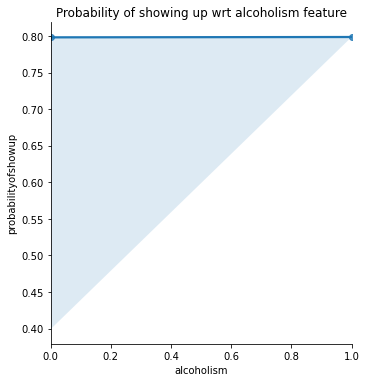

In [47]:
# probability of patient showing up for their appointment wrt alcoholism feature
sns.lmplot(data=showedup_proba(df, 'alcoholism'), x='alcoholism', y='probabilityofshowup', 
           fit_reg=True);
plt.title('Probability of showing up wrt alcoholism feature');
# plt.xticks(df.agebins, labels=['0-10', '11-24', '25-37', '38-50', '51-61', '62-115'])
# plt.show()

From the probability visualization on the `alcoholism` feature, the data suggests very weak correlation between patients with `alcoholism` and those without and their ability to show up for their appointments. Generally, there is no noticable difference between patients with `alcoholism` and those without. They both have the same probability of showing up foro their appointments.

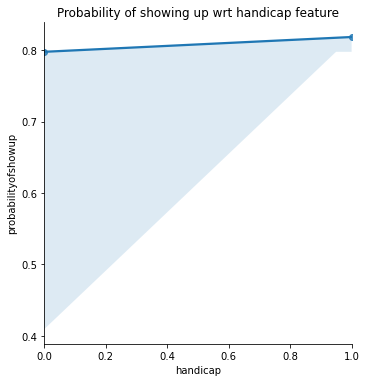

In [48]:
# probability of patient showing up for their appointment wrt handicap feature
sns.lmplot(data=showedup_proba(df, 'handicap'), x='handicap', y='probabilityofshowup', 
           fit_reg=True);
plt.title('Probability of showing up wrt handicap feature');
# plt.xticks(df.agebins, labels=['0-10', '11-24', '25-37', '38-50', '51-61', '62-115'])
# plt.show()

From the probability visualization on the `handicap` feature, the data suggests very weak correlation between patients with `handicap` and those without and their ability to show up for their appointments. Generally, patients with `handicap` show a higher probability of showing up for their appointments than those without `handicap`.

The dataset presented 3 health conditions vis-a-vis `hypertension`, `diabetes`, `alcoholism` and `handicap`. From the probability visualization review of the relationship between such conditions and showing up for the appointments, we see that the presence or absence of such medical conditions did not greatly improve or limit the patient's ability to honor the appointment.

### Research Question 3: Is there a relationship between the number of days to the appointment and failure to show up for the appointment?

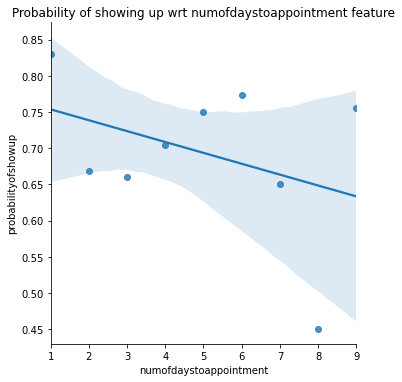

In [49]:
# probability of patient showing up for their appointment wrt numofdaystoappointment feature
sns.lmplot(data=showedup_proba(df, 'numofdaystoappointment'), x='numofdaystoappointment', y='probabilityofshowup', 
           fit_reg=True);
plt.title('Probability of showing up wrt numofdaystoappointment feature');

From the probability visualization on the `numofdaystoappointment` feature, the data suggests that appointments that have a longer period duration have a lower probability of showing up than appointments that do not have such long wait times. However, this is not very conclusive.

<a id='conclusions'></a>
## Conclusions

This data analysis project analysed the provided dataset with a view to answering some questions about the no-show to appointments by patients in Brazil. The questions we are attempting to answer are included at the introdution of this report.

From the data analysis we see that the features `age` (via the `agebins` engineered feature), `scheduledday` (via the `scheduledweekday` engineered feature), and `appointmentday` (via the `appointmentweekday` engineered feature) are important factors that could be used to predit if a patient would show up for their appointments or not. We could perform further research, later, to discover the relationship between the `agebins` and the `handicap` features. Namely, are there patients with a `handicap` and with an `age` greater than 50 who always attended their appointments?

The data suggests that older patients (patients above 50 years) are more likely to show up for their appointments; while patients that registered their appointments on a saturday are more likey to keep their appointments while patients that are scheduled for Fridays or Saturdays are least likely to show up for their appointments.

We also observed that the documented health conditions of `hypertension`, `diabetes`, `alcoholism`, and `handicap`, individually does not play a significant role in informing if a patient would miss their appointments. A further research on this might be to review if there are patients with multiple health conditions and if such multiple conditions would play a signifiant role in their missing their appointments.

We also allowed the data to speak about the relationship between the wait duration (`numofdaystoappointment` feature) and the probability of not showing for an appointment. We observed that appointments with such long wait duration have a lower probability of showing up than appointments that do not have such long wait times. However, this is not very conclusive.

It should be noted that I did not remove data others might have perceived as outliers in the `age`column because I am of the opinion that these are real patients and that their ppresence does not greatly affect the analysis negatively.

Another limitation of this dataset is that the `appointmentday` feature seems to be a slice of a larger dataset, since it only presented records for a little over 1 month while the `scheduledday` feature showed a record spanning almost a year. It might also be a limitation that the condensed days for the `appointmentday` feature had a large number of publi holidays as maybe offered by the Brazilian Government.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1